In [1]:
# only adjust settings in this cell
state = 'NE'
root_name = 'Douglas'  # which county will root our first district 
k = 3                  # the state has this number of districts
deviation = 1          # use: L=ideal_population-deviation, U=ideal_population-deviation
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = '..\\dat\\'
filename = state + '_county.json'

from util import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
print("State has total of k =",G._k,"districts")

State has total of k = 3 districts


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 653834
Single district upper population limit U = 653835


In [5]:
# Require this county be in our first district
G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Douglas County to be the root. In our graph, this is vertex # 76


In [6]:
from optimization import districting_heuristic

plans = districting_heuristic(G, obj_type='cut_edges', enumeration_limit=10)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-19
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 745 rows, 880 columns and 3738 nonzeros
Model fingerprint: 0xa8538c0f
Variable types: 463 continuous, 417 integer (417 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 125 rows and 138 columns
Presolve time: 0.01s
Presolved: 620 rows, 742 columns, 2925 nonzeros
Variable types: 423 continuous, 319 integer (319 binary)

Root relaxation: objective 5.471193e+00, 312 iterations, 


     0     0    2.93496    0   46          -    2.93496      -     -    0s
     0     0    3.59734    0   60          -    3.59734      -     -    0s
     0     0    3.91327    0   61          -    3.91327      -     -    0s
     0     0    3.92862    0   63          -    3.92862      -     -    0s
     0     0    3.92862    0   64          -    3.92862      -     -    0s
     0     0    3.99580    0   63          -    3.99580      -     -    0s
     0     0    3.99783    0   63          -    3.99783      -     -    0s
     0     2    4.38943    0   63          -    4.38943      -     -    0s
 50988 12877   31.38917   33   11          -   23.65811      -  14.8    5s

Cutting planes:
  Gomory: 2
  MIR: 1
  Flow cover: 1
  Lazy constraints: 124

Explored 104021 nodes (1239472 simplex iterations) in 9.24 seconds (4.00 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 210475, time 


 ***Seeking district # 2 for partial plan [[2, 3, 4, 10, 11, 31, 40, 44, 54, 59, 70, 72, 76, 83, 89]]
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 594 rows, 652 columns and 2810 nonzeros
Model fingerprint: 0xa1eb3299
Variable types: 331 continuous, 321 integer (321 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+05]
Presolve removed 226 rows and 112 columns
Presolve time: 0.01s
Presolved: 368 rows, 540 columns, 1855 nonzeros
Variable types: 324 continuous, 216 integer (216 binary)

Root relaxation: objective 2.934961e+00, 158 

found [0, 5, 12, 15, 17, 18, 19, 21, 22, 23, 24, 25, 29, 32, 33, 34, 35, 37, 39, 41, 42, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 61, 62, 63, 66, 67, 68, 73, 79, 80, 84, 85, 86, 90] with objective = 33
   ^added to list!
found [0, 1, 4, 5, 12, 15, 17, 19, 20, 21, 22, 23, 24, 25, 29, 32, 34, 35, 37, 39, 40, 41, 42, 45, 47, 49, 51, 52, 53, 54, 55, 57, 58, 62, 63, 64, 67, 68, 73, 79, 80, 84, 85, 90] with objective = 36
   ^added to list!
 1021610 462871   35.00000   25   25          -   25.41093      -  15.4   85s
 1081071 484770   37.15774   37   15          -   25.63894      -  15.4   90s
found [0, 4, 5, 12, 15, 17, 18, 19, 21, 23, 25, 29, 32, 33, 34, 35, 39, 41, 42, 44, 45, 47, 48, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 62, 63, 66, 67, 68, 72, 73, 79, 80, 84, 85] with objective = 49
   ^added to list!
 1140856 506543   30.06712   35   15          -   25.89482      -  15.4   95s
found [2, 6, 15, 17, 18, 19, 20, 21, 22, 25, 28, 29, 33, 36, 47, 48, 50, 51, 60, 61, 62, 64, 66, 67, 

 3302585 871340   32.92277   42    8          -   32.13797      -  14.9  335s
 3340545 845713 infeasible   39               -   32.37498      -  14.9  340s
 3377906 817765 infeasible   33               -   32.66573      -  14.9  345s
 3415387 783999 infeasible   35               -   33.00000      -  14.9  350s

Cutting planes:
  Gomory: 4
  Cover: 87
  Implied bound: 3
  Flow cover: 8
  Inf proof: 3
  Zero half: 18
  Mod-K: 2
  Lazy constraints: 375

Explored 3419099 nodes (50807551 simplex iterations) in 351.58 seconds (149.11 work units)
Thread count was 20 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 6903202, time in user-callback 26.97 sec
Finished plan # 1
Finished plan # 2
Finished plan # 3
Finished plan # 4
Finished plan # 5
Finished plan # 6
Finished plan # 7
Finished plan # 8
Finished plan # 9
Finished plan # 10

 ***Seeking district # 2 for partial plan [[2, 4, 10, 30, 38, 40, 44, 70, 72, 75, 76

 1820626 440765   51.61569   29   72          -   46.17396      -  20.1  200s
 1866021 446232   49.05235   30   58          -   46.44762      -  20.1  205s
found [1, 3, 11, 13, 14, 18, 20, 21, 22, 31, 36, 37, 39, 47, 50, 54, 55, 56, 59, 64, 78, 81, 85, 88, 90] with objective = 48
   ^added to list!
adding cut saying that objective should be less than 57
 1907105 450295   55.40811   37   40          -   46.70517      -  20.1  210s
found [1, 3, 11, 13, 14, 18, 20, 21, 31, 36, 37, 47, 50, 55, 56, 59, 64, 66, 82, 83, 85, 88, 90, 92] with objective = 49
   replaced worse solution with objective = 57
adding cut saying that objective should be less than 54
found [1, 3, 11, 13, 14, 18, 20, 21, 22, 36, 37, 47, 54, 55, 56, 64, 66, 74, 82, 85, 88, 92] with objective = 49
   replaced worse solution with objective = 54
adding cut saying that objective should be less than 53
 1950553 447526   50.75811   30  113          -   47.06422      -  20.0  215s
 1990168 438494 infeasible   43               - 

# cut_edges perimeter ave_invpp
0 84 52.9957 8.811
1 81 51.0065 8.0774
2 83 51.874 8.3759
3 79 50.7697 8.0315
4 82 50.7582 8.0252
5 80 50.7867 8.0289
6 84 51.9259 8.4366
7 83 52.2546 8.5061
8 83 51.3478 8.2016
9 83 51.7734 8.378
10 88 53.5509 8.8836
11 88 53.5883 8.7493
12 91 54.671 9.185
13 91 54.8665 9.267
14 89 53.6993 8.9031
15 91 54.1992 8.9286
16 90 54.9266 9.2419
17 86 53.139 8.7514
18 89 53.4952 8.8301
19 85 53.8482 9.0303


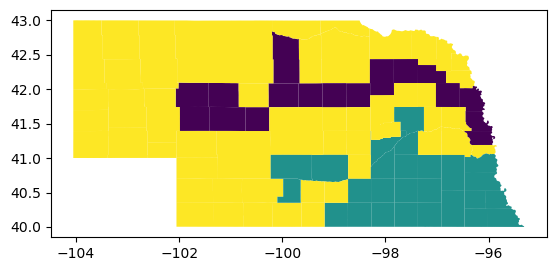

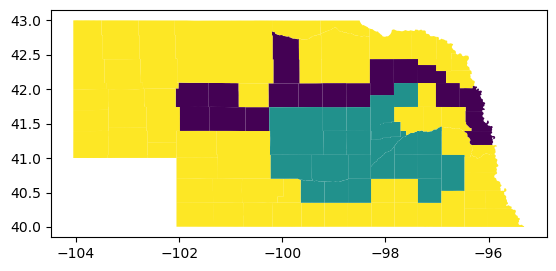

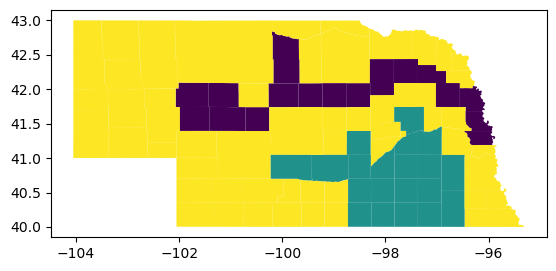

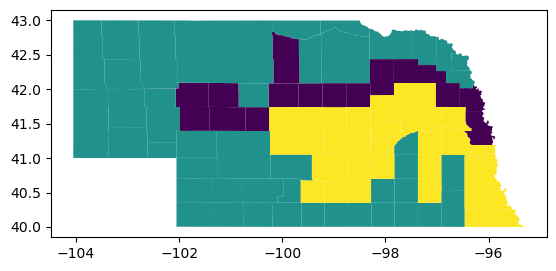

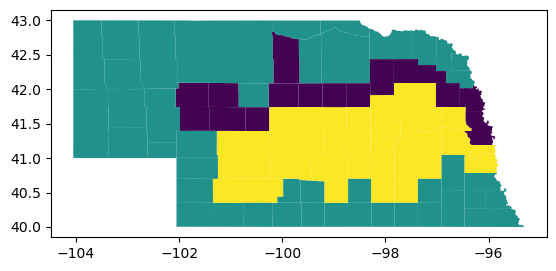

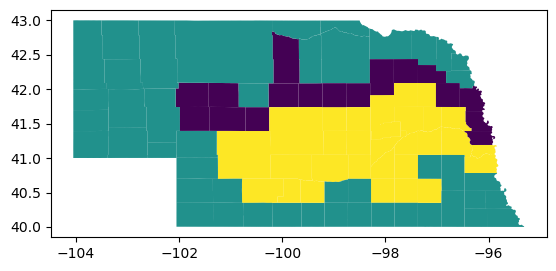

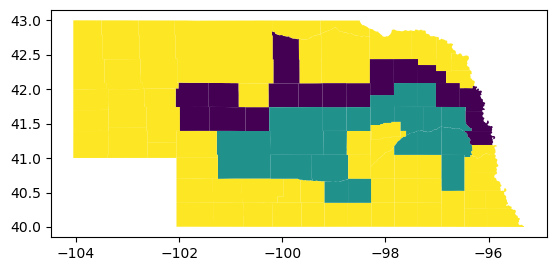

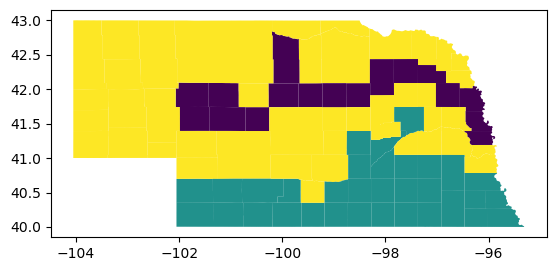

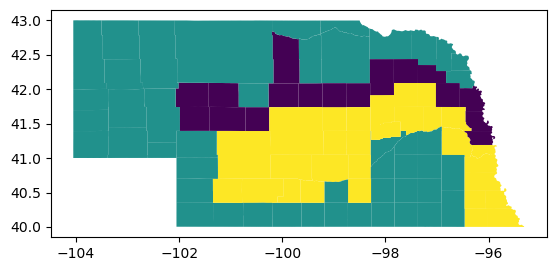

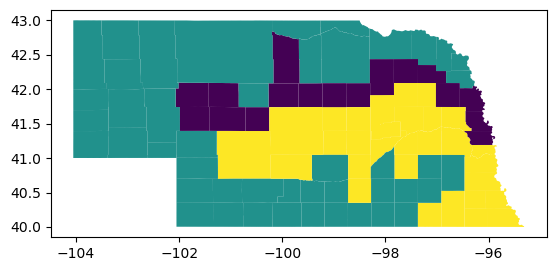

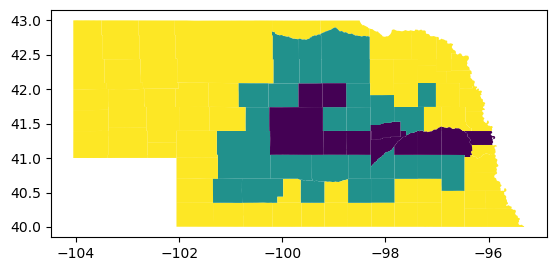

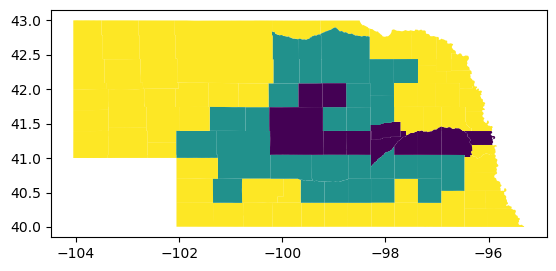

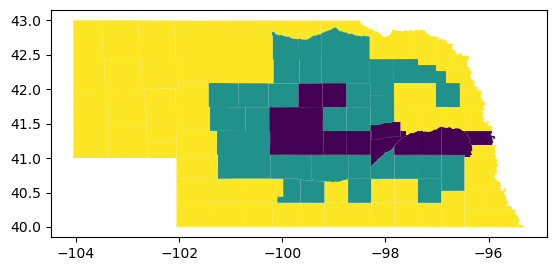

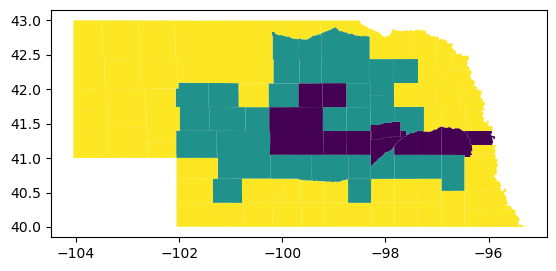

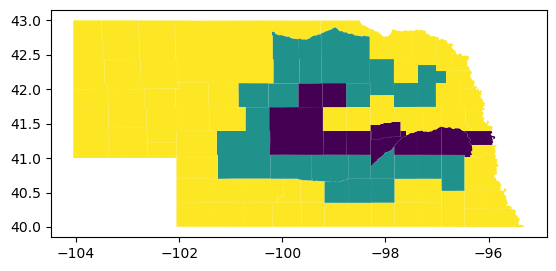

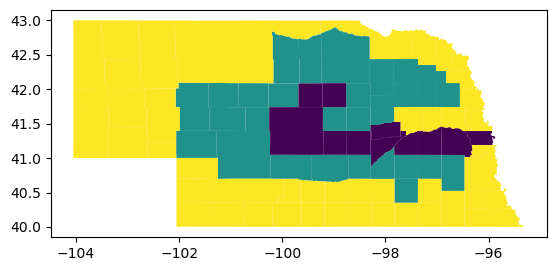

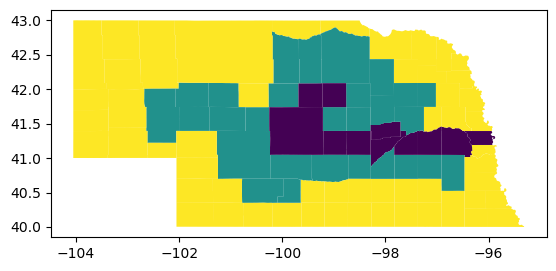

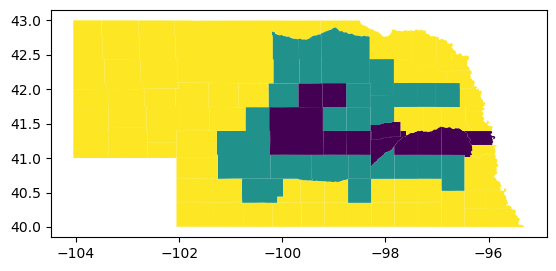

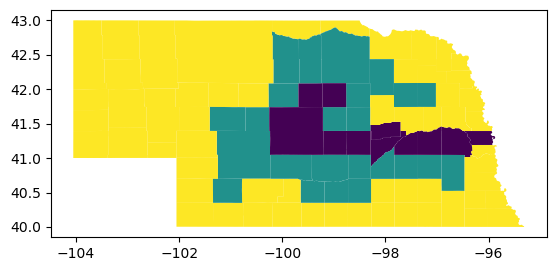

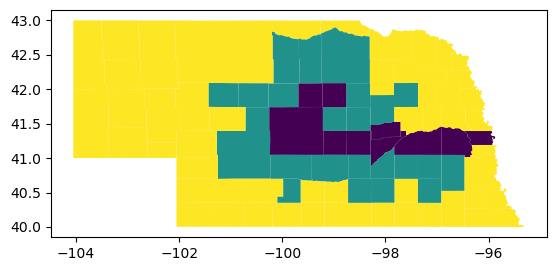

In [7]:
from util import plan_objective
from draw import draw_plan
filename = state + '_county.shp'

print("# cut_edges perimeter ave_invpp")
for p in range(len(plans)):
    plan = plans[p]
    ce = round( plan_objective(G, plan, 'cut_edges') )
    pe = round( plan_objective(G, plan, 'perimeter'), 4)
    pp = round( plan_objective(G, plan, 'inverse_polsby_popper'), 4)
    print(p, ce, pe, pp) #, plan)
    draw_plan( filepath, filename, G, plan )

In [8]:
print("plans =",plans)

plans = [[[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [4, 6, 15, 18, 19, 20, 21, 22, 28, 33, 37, 47, 48, 51, 60, 61, 64, 65, 69, 71, 72, 78, 86, 87, 88, 91], [0, 1, 2, 5, 7, 10, 12, 13, 16, 17, 23, 24, 25, 29, 30, 31, 32, 34, 35, 36, 39, 40, 41, 42, 43, 44, 45, 49, 50, 52, 53, 54, 55, 57, 58, 59, 62, 63, 66, 67, 68, 70, 73, 79, 80, 81, 82, 84, 85, 90]], [[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [2, 4, 18, 20, 21, 30, 31, 36, 37, 40, 44, 47, 50, 59, 61, 64, 66, 70, 72, 81, 82, 88], [0, 1, 5, 6, 7, 10, 12, 13, 15, 16, 17, 19, 22, 23, 24, 25, 28, 29, 32, 33, 34, 35, 39, 41, 42, 43, 45, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 62, 63, 65, 67, 68, 69, 71, 73, 78, 79, 80, 84, 85, 86, 87, 90, 91]], [[3, 8, 9, 11, 14, 26, 27, 38, 46, 56, 74, 75, 76, 77, 83, 89, 92], [18, 19, 20, 21, 22, 30, 33, 36, 37, 44, 47, 48, 51, 60, 61, 64, 72, 78, 87, 88], [0, 1, 2, 4, 5, 6, 7, 10, 12, 13, 15, 16, 17, 23, 24, 25, 28, 29, 31, 32, 34, 35, 39, 40, 41, 42, 43,